# Regression Assumptions Diagnostics

This notebook demonstrates the four key regression assumptions: Linearity, Homoscedasticity, Normality, and Independence, using both non-violated and violated examples. Each section includes relevant diagnostic plots with annotations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style='whitegrid')

## Helper Functions for Diagnostic Plots

In [2]:
def plot_residuals_vs_fitted(model, ax=None):
    residuals = model.resid
    fitted = model.fittedvalues
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(fitted, residuals, alpha=0.6)
    sns.regplot(x=fitted, y=residuals, lowess=True, ax=ax, line_kws={'color':'red'})
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.text(0.95,0.05,'Random scatter ~ linearity OK\nFunnel shape ~ heteroscedasticity',
            transform=ax.transAxes, fontsize=9, ha='right', va='bottom', color='blue')
    ax.set_title('Residuals vs Fitted')
    return ax

def plot_scale_location(model, ax=None):
    residuals = model.resid
    fitted = model.fittedvalues
    sqrt_std_resid = np.sqrt(np.abs(residuals / np.std(residuals)))
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(fitted, sqrt_std_resid, alpha=0.6)
    sns.regplot(x=fitted, y=sqrt_std_resid, lowess=True, ax=ax, line_kws={'color':'red'})
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Sqrt(|Standardized Residuals|)')
    ax.set_title('Scale-Location')
    ax.text(0.95,0.05,'Horizontal ~ constant variance\nRising/falling ~ heteroscedasticity',
            transform=ax.transAxes, fontsize=9, ha='right', va='bottom', color='blue')
    return ax

def plot_qq(model, ax=None):
    residuals = model.resid
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    sm.qqplot(residuals, line='45', ax=ax)
    ax.set_title('Q-Q Plot')
    ax.text(0.95,0.05,'Points ~45° line → normal\nDeviations → non-normality',
            transform=ax.transAxes, fontsize=9, ha='right', va='bottom', color='blue')
    return ax

def plot_residual_autocorrelation(model, show_acf=True, ax=None):
    residuals = model.resid
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    if show_acf:
        sm.graphics.tsa.plot_acf(residuals, ax=ax)
        ax.set_title('Residual Autocorrelation')
        ax.text(0.95,0.05,'Spikes outside CI → dependence\nOtherwise → independent',
                transform=ax.transAxes, fontsize=9, ha='right', va='bottom', color='blue')
    else:
        ax.scatter(np.arange(len(residuals)), residuals)
        ax.axhline(0, color='red', linestyle='--')
        ax.set_xlabel('Observation')
        ax.set_ylabel('Residuals')
        ax.set_title('Residuals vs Observation')
        ax.text(0.95,0.05,'Random scatter → independent\nPatterns → autocorrelation',
                transform=ax.transAxes, fontsize=9, ha='right', va='bottom', color='blue')
    return ax

def plot_residuals_histogram(model, ax=None):
    residuals = model.resid
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
    ax.set_title("Histogram of Residuals")
    ax.set_xlabel("Residual")
    ax.set_ylabel("Frequency")
    ax.text(0.95, 0.95, "Bell-shaped → normal\nSkew/multimodal → non-normal",
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            horizontalalignment='right', color='blue')

def plot_diagnostics_annotated(model, show_acf=True):
    fig, axs = plt.subplots(2, 3, figsize=(18,10))
    
    plot_residuals_vs_fitted(model, ax=axs[0,0])
    plot_scale_location(model, ax=axs[0,1])
    plot_residual_autocorrelation(model, ax=axs[0,2], show_acf=False)  # Residuals vs Observation

    plot_qq(model, ax=axs[1,0])
    plot_residuals_histogram(model, ax=axs[1,1])
    plot_residual_autocorrelation(model, ax=axs[1,2], show_acf=True)  # ACF
    plt.tight_layout()
    plt.show()

## 1️⃣ Linearity

Graphs to examine: Residuals vs Fitted.
Random scatter around 0 indicates linearity is satisfied. Curvature indicates violation.

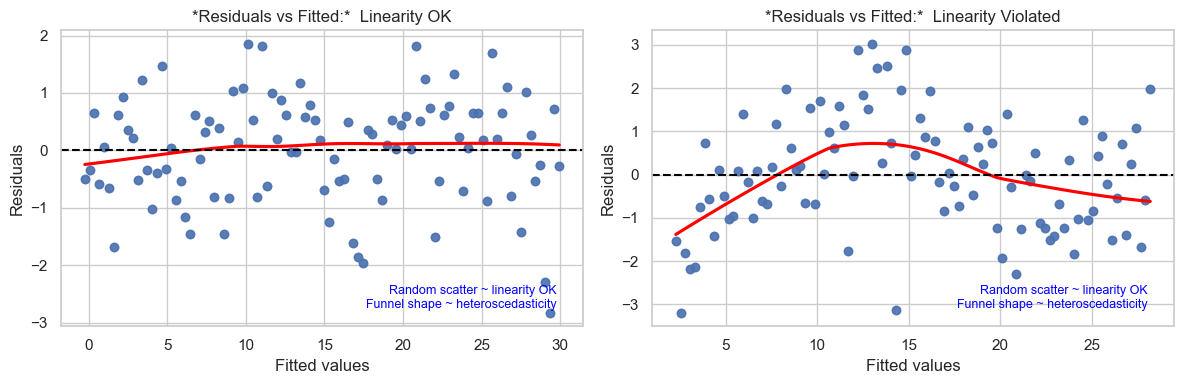

In [3]:
n = 100
X_lin = np.linspace(0,10,n)

# Non-violating linear
Y_lin_good = 3*X_lin + np.random.normal(0,1,n)
model_linear_good = sm.OLS(Y_lin_good, sm.add_constant(X_lin)).fit()

# Violating non-linear
Y_lin_bad = 3*X_lin + 2*np.sin(.5*X_lin) + np.random.normal(0,1,n)
model_linear_bad = sm.OLS(Y_lin_bad, sm.add_constant(X_lin)).fit()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_residuals_vs_fitted(model_linear_good, ax=axes[0])
axes[0].set_title('*Residuals vs Fitted:*  Linearity OK')
plot_residuals_vs_fitted(model_linear_bad, ax=axes[1])
axes[1].set_title('*Residuals vs Fitted:*  Linearity Violated')
plt.tight_layout()
plt.show()

## 2️⃣ Homoscedasticity

Graphs to examine: Residuals vs Fitted and Scale-Location.
Flat spread indicates constant variance; funnel shapes indicate heteroscedasticity.

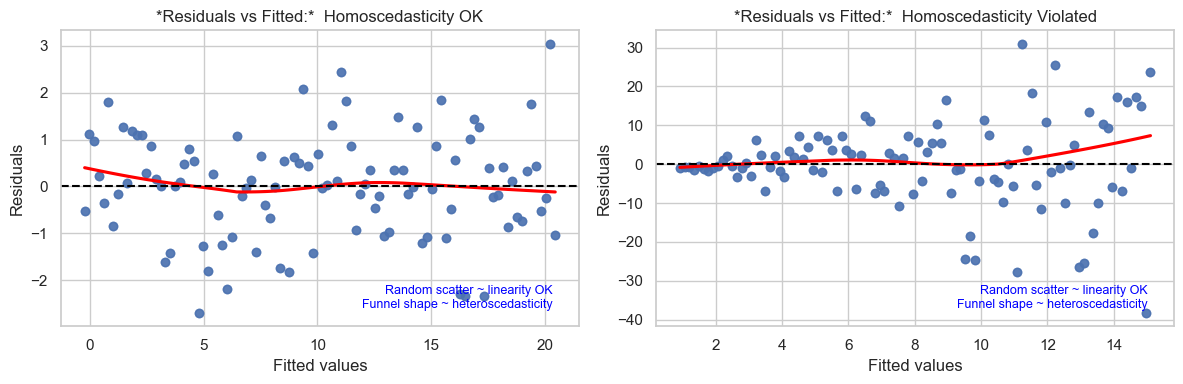

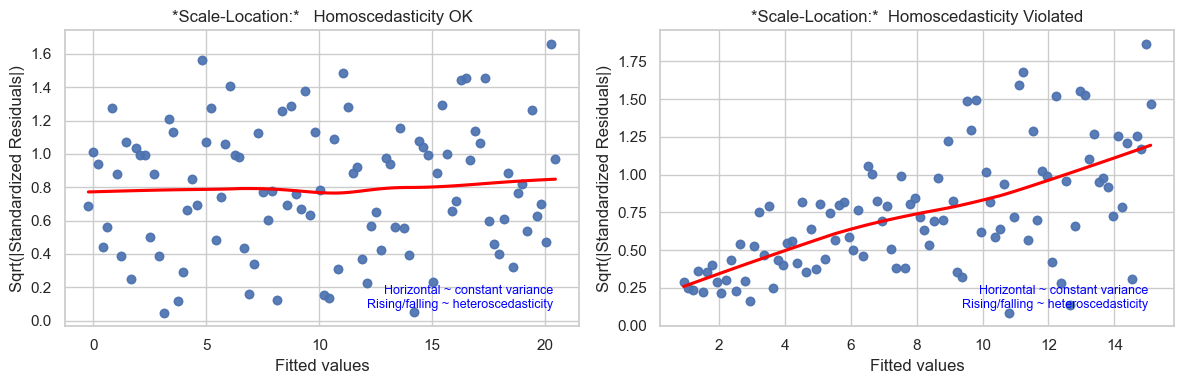

In [4]:
n = 100
X = np.linspace(0,10,n)

# Constant variance
Y_homo_good = 2*X + np.random.normal(0,1,n)
model_homo_good = sm.OLS(Y_homo_good, sm.add_constant(X)).fit()

# Increasing variance
Y_homo_bad = 2*X + np.random.normal(0,X*2,n)
model_homo_bad = sm.OLS(Y_homo_bad, sm.add_constant(X)).fit()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_residuals_vs_fitted(model_homo_good, ax=axes[0])
axes[0].set_title('*Residuals vs Fitted:*  Homoscedasticity OK')
plot_residuals_vs_fitted(model_homo_bad, ax=axes[1])
axes[1].set_title('*Residuals vs Fitted:*  Homoscedasticity Violated')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_scale_location(model_homo_good, ax=axes[0])
axes[0].set_title('*Scale-Location:*   Homoscedasticity OK')
plot_scale_location(model_homo_bad, ax=axes[1])
axes[1].set_title('*Scale-Location:*  Homoscedasticity Violated')
plt.tight_layout()
plt.show()

## 3️⃣ Normality

Graphs to examine: Q-Q Plot, optionally Histogram of residuals.
Points following the 45° line indicate normal residuals. Deviations indicate non-normality.

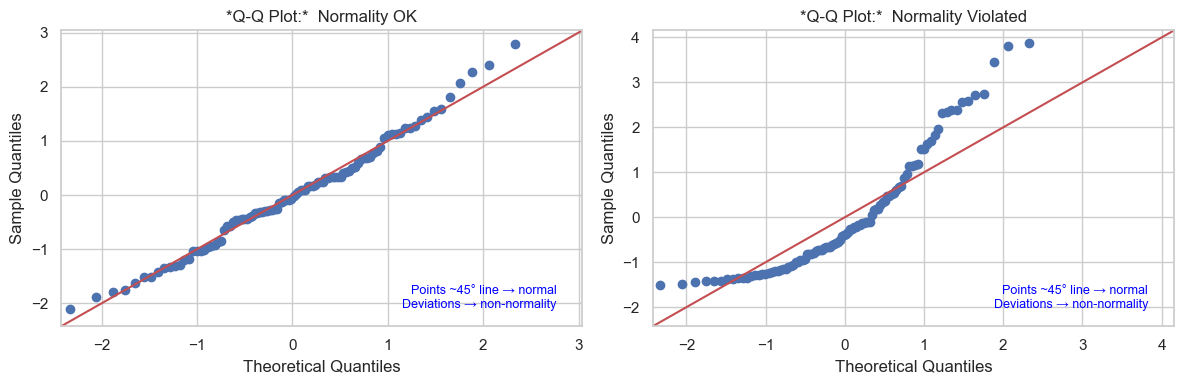

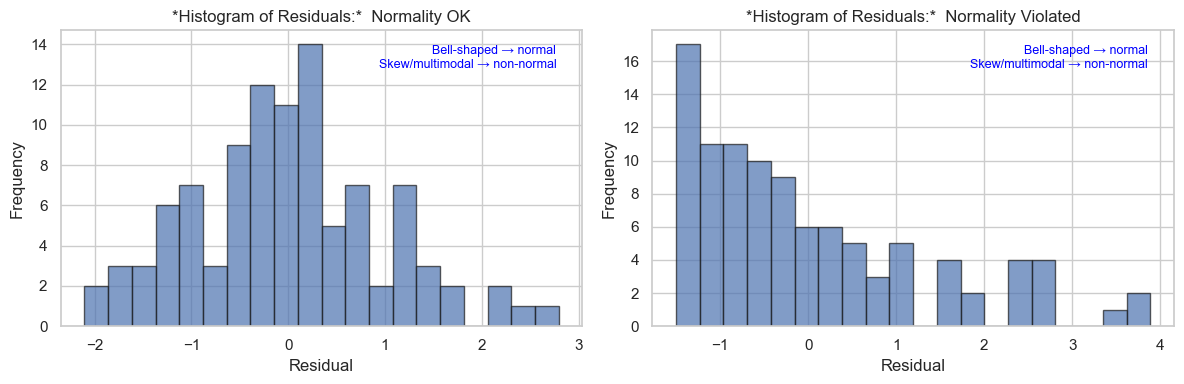

In [5]:
n = 100
X = np.linspace(0,10,n)

# Normal residuals
Y_norm_good = 3*X + np.random.normal(0,1,n)
model_norm_good = sm.OLS(Y_norm_good, sm.add_constant(X)).fit()

# Non-normal residuals (exponential)
Y_norm_bad = 3*X + np.random.exponential(scale=2,size=n)
model_norm_bad = sm.OLS(Y_norm_bad, sm.add_constant(X)).fit()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_qq(model_norm_good, ax=axes[0])
axes[0].set_title('*Q-Q Plot:*  Normality OK')
plot_qq(model_norm_bad, ax=axes[1])
axes[1].set_title('*Q-Q Plot:*  Normality Violated')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_residuals_histogram(model_norm_good, ax=axes[0])
axes[0].set_title("*Histogram of Residuals:*  Normality OK")
plot_residuals_histogram(model_norm_bad, ax=axes[1])
axes[1].set_title("*Histogram of Residuals:*  Normality Violated")
plt.tight_layout()
plt.show()

## 4️⃣ Independence

Graphs to examine: Residual Autocorrelation (ACF), optionally Residuals vs Observation.
Random scatter indicates independent errors; patterns or significant ACF spikes indicate dependence.

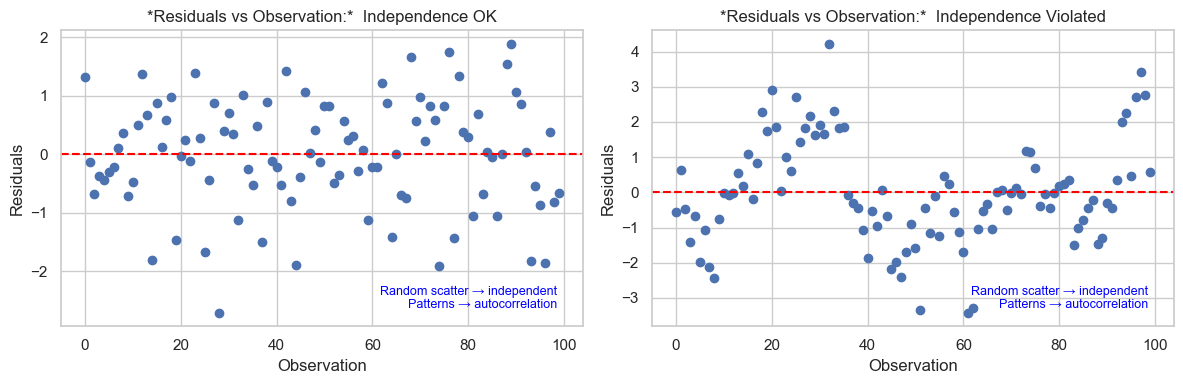

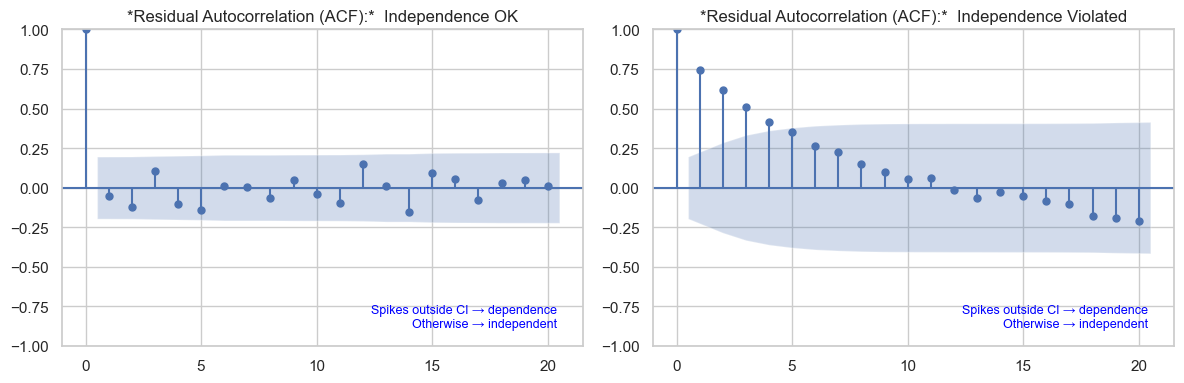

In [6]:
n = 100

# Independent errors
X = np.arange(n)
Y_ind_good = 2*X + np.random.normal(0,1,n)
model_ind_good = sm.OLS(Y_ind_good, sm.add_constant(X)).fit()

# Dependent errors (AR(1))
Y_ind_bad = np.zeros(n)
for i in range(1,n):
    Y_ind_bad[i] = 0.8*Y_ind_bad[i-1] + np.random.normal(0,1)
X_ind = np.arange(n)
model_ind_bad = sm.OLS(Y_ind_bad, sm.add_constant(X_ind)).fit()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_residual_autocorrelation(model_ind_good, ax=axes[0], show_acf=False)
axes[0].set_title('*Residuals vs Observation:*  Independence OK')
plot_residual_autocorrelation(model_ind_bad, ax=axes[1], show_acf=False)
axes[1].set_title('*Residuals vs Observation:*  Independence Violated')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_residual_autocorrelation(model_ind_good, ax=axes[0], show_acf=True)
axes[0].set_title('*Residual Autocorrelation (ACF):*  Independence OK')
plot_residual_autocorrelation(model_ind_bad, ax=axes[1], show_acf=True)
axes[1].set_title('*Residual Autocorrelation (ACF):*  Independence Violated')
plt.tight_layout()
plt.show()

# ✅ Full Diagnostic Example

You can also call the 6 plots together:

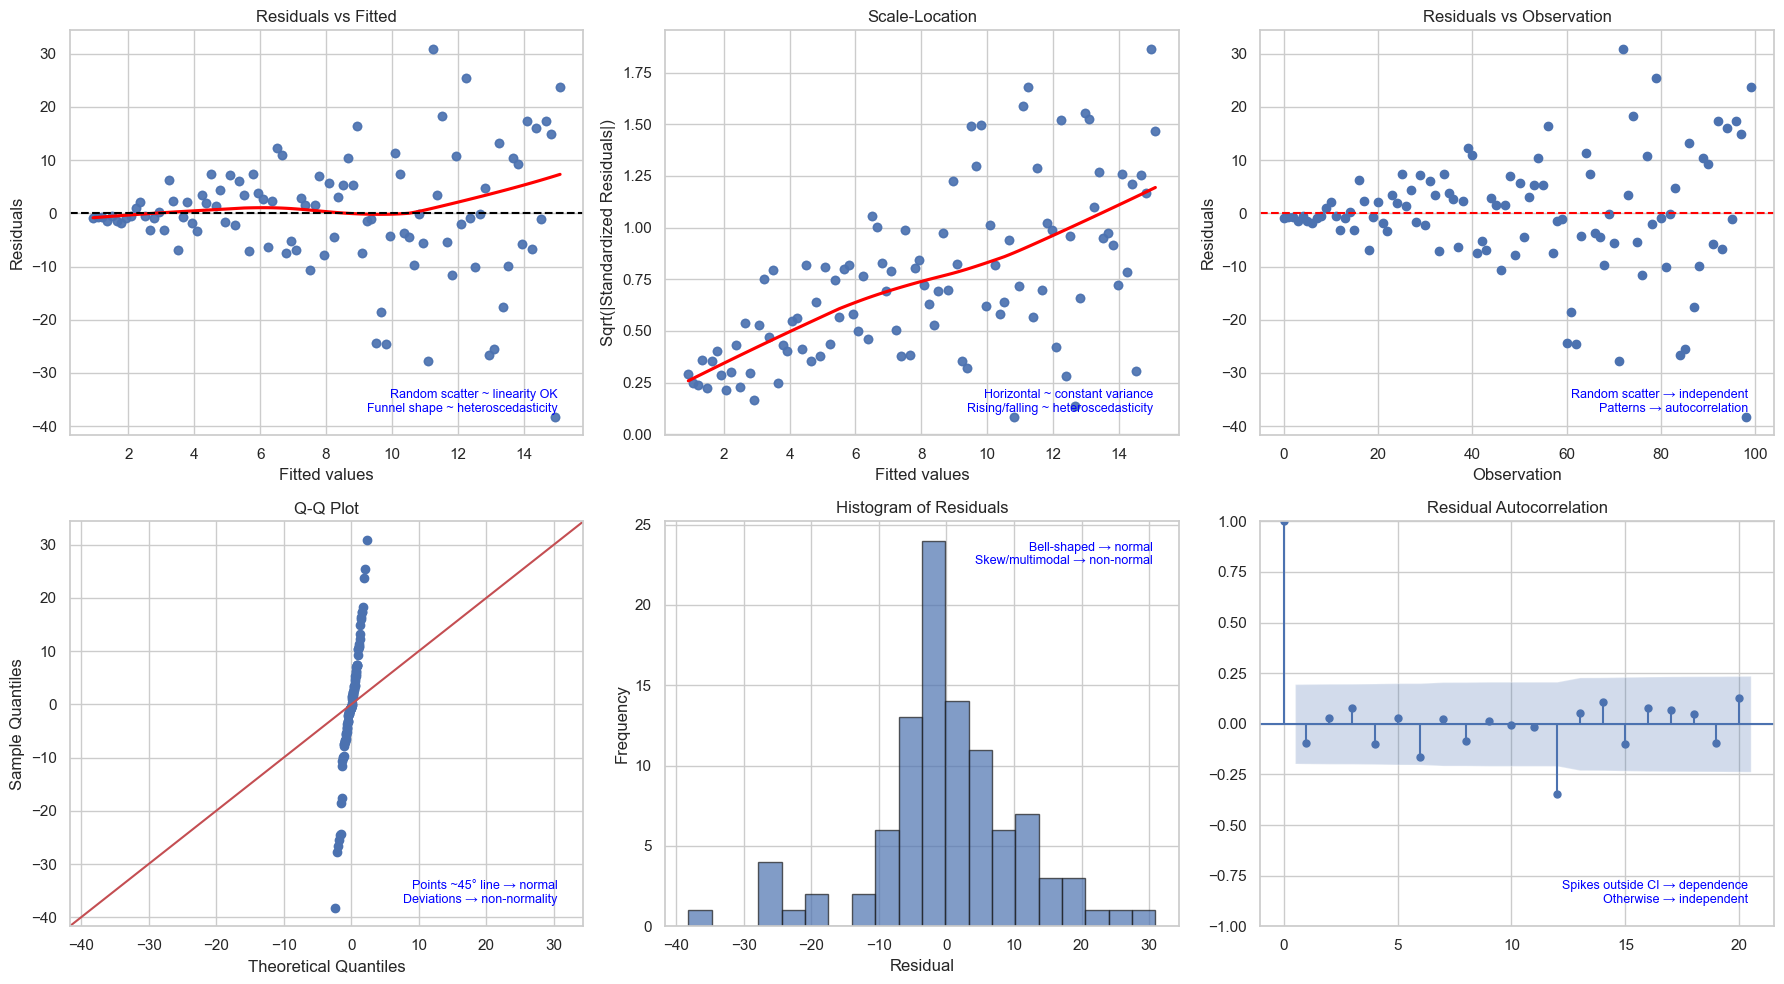

In [7]:
plot_diagnostics_annotated(model_homo_bad)

## Regression Assumptions Diagnostic Cheat Sheet

| Assumption | Primary Diagnostic Plot | Secondary Diagnostic Plot | What to Look For |
|------------|-------------------------|---------------------------|------------------|
| **Linearity** | Residuals vs Fitted | – | Random scatter around 0 → linearity satisfied. Curvature → non-linearity. |
| **Homoscedasticity (constant variance)** | Scale-Location | Residuals vs Fitted | Funnel shape or systematic trend → heteroscedasticity. Horizontal spread → constant variance. |
| **Normality of errors** | Q-Q Plot | Histogram of Residuals | Points on 45° line → normal residuals. Deviations at ends → non-normality. Histogram bell-shaped → normal; skew/multimodal → non-normal. |
| **Independence / no autocorrelation** | Residual Autocorrelation (ACF) | Residuals vs Observation | Spikes outside confidence bands → dependence. Random small spikes → independent. Residual scatter random → independence; visible patterns → autocorrelation. |

**Notes:**
- `Residuals vs Fitted` can help detect both linearity and heteroscedasticity.  
- `Scale-Location` emphasizes non-constant variance more clearly.  
- Q-Q plot focuses purely on the distribution of residuals.  
- Residual ACF highlights dependence between observations.  
